# PEP 558 - Homework #4

## Problem 11

## Circuit 1

### QISKIT Code

In [1]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
quantum_circuit = QuantumCircuit(qreg_q, creg_c)

quantum_circuit.x(qreg_q[1])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.h(qreg_q[0])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.cx(qreg_q[0], qreg_q[1])
quantum_circuit.barrier(qreg_q[0], qreg_q[1])
quantum_circuit.measure(qreg_q[1], creg_c[1])
quantum_circuit.measure(qreg_q[0], creg_c[0])

In [2]:
quantum_circuit.draw()

░ ┌───┐ ░       ░    ┌─┐
q_0: ──────░─┤ H ├─░───■───░────┤M├
     ┌───┐ ░ └───┘ ░ ┌─┴─┐ ░ ┌─┐└╥┘
q_1: ┤ X ├─░───────░─┤ X ├─░─┤M├─╫─
     └───┘ ░       ░ └───┘ ░ └╥┘ ║ 
c: 2/═════════════════════════╩══╩═
                              1  0

### IBM Quantum Composer output:

|01>

### AER Simulator

In [3]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend= QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)





Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='7f7efbda-4af6-425e-81a0-0905424ff946', job_id='869d520f-bd3a-4ad0-a064-ec60660f5a7f', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 495, '0x1': 529}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-85', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=1165421540, metadata={'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.000890334, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0, 1], 'measure_sampling': True, 'num_clbits': 2, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.0024465)], date=2023-02-20T19:45:08.888803, statu

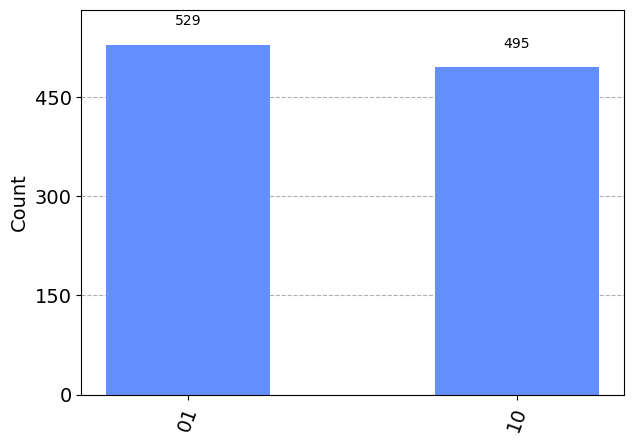

In [4]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)


In [5]:
# Let us see the counts
print(counts)


{'10': 495, '01': 529}


### IBMQ

['ibmq_qasm_simulator', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_jakarta', 'ibmq_manila', 'ibm_lagos', 'ibm_nairobi', 'ibm_perth', 'ibm_oslo']
Job Status: job has successfully run


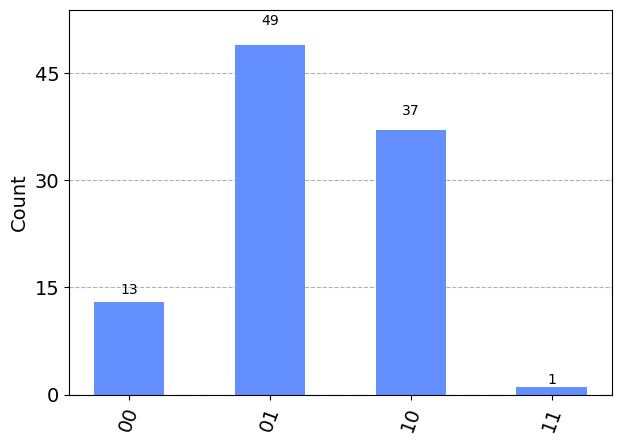

In [6]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()




# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)

# Problem 14

## Circuit 1

### QISKIT Code

In [7]:
#QISKIT
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
quantum_circuit = QuantumCircuit(qreg_q, creg_c)

quantum_circuit.h(qreg_q[1])
quantum_circuit.cx(qreg_q[1], qreg_q[2])
quantum_circuit.cx(qreg_q[0], qreg_q[1])
quantum_circuit.h(qreg_q[0])
quantum_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
quantum_circuit.measure(qreg_q[0], creg_c[0])
quantum_circuit.measure(qreg_q[1], creg_c[1])
quantum_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
quantum_circuit.cx(qreg_q[1], qreg_q[2])
quantum_circuit.cz(qreg_q[0], qreg_q[2])

In [8]:
# remember to convert circuit -> quantum_circuit

In [9]:
quantum_circuit.draw()

┌───┐ ░ ┌─┐    ░         
q_0: ────────────■──┤ H ├─░─┤M├────░───────■─
     ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
     └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ─────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
          └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════╩══╩════════════
                             0  1

### IBM Quantum Composer output:

|001>

### Aer Simulator

In [10]:
# As we can see, the circuit is now built according to the image. We can now measure the qubit at the quantum register.
# For this we have two methods, AER(quantum computer simulator) and IBMQ (IBM's quantum computer)

#AER
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
job = backend.run(quantum_circuit,shots=1024)
result = job.result()
print(result)





Result(backend_name='qasm_simulator', backend_version='0.11.2', qobj_id='d86a8e1f-53f0-43e3-b8fb-567ee7974f86', job_id='d785e1c0-008e-4edf-8b15-38685e669520', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 252, '0x3': 244, '0x2': 259, '0x0': 269}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata={}, n_qubits=3, name='circuit-96', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=240525774, metadata={'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.00207225, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'device': 'CPU', 'active_input_qubits': [0, 1, 2], 'measure_sampling': True, 'num_clbits': 3, 'input_qubit_map': [[2, 2], [1, 1], [0, 0]], 'num_qubits': 3, 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_take

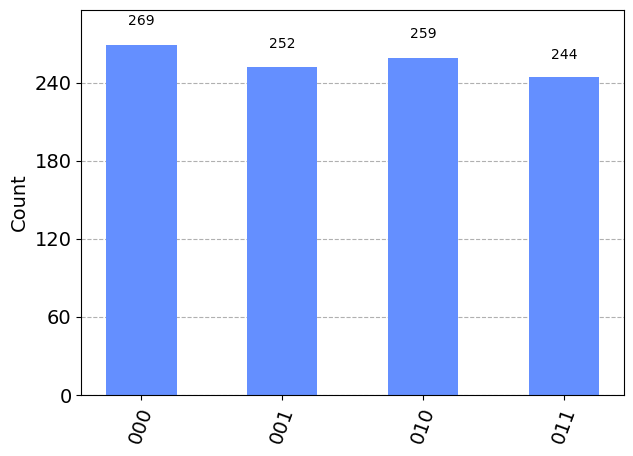

In [11]:
# We can plot a histogram to see the values
from qiskit.visualization import plot_histogram
counts = result.get_counts(quantum_circuit)
plot_histogram(counts)


In [12]:
# Let us see the counts
print(counts)


{'001': 252, '011': 244, '010': 259, '000': 269}


ibmqfactory.load_account:WARNING:2023-02-20 19:47:43,482: Credentials are already in use. The existing account in the session will be replaced.


['ibmq_qasm_simulator', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_jakarta', 'ibmq_manila', 'ibm_lagos', 'ibm_nairobi', 'ibm_perth', 'ibm_oslo']
Job Status: job has successfully run


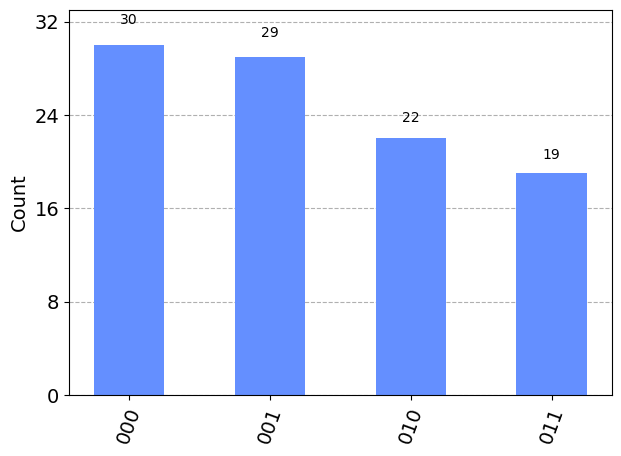

In [13]:
#IBMQ

# Now let us see the working of this circuit on a real quantum machine.
# Note: You need to create an IBMQ account before proceeding.
from qiskit import *
from qiskit import IBMQ

# This step is for first time users.
# 'IBMQ.save_account(TOKEN)'
# For this token, visit https://quantum-computing.ibm.com/ create an account with any email id
# and login to view the token and copy it.

# This step is after you have created and saved your account.
IBMQ.load_account()

# To view all the poviders
print([backend.name() for backend in IBMQ.providers()[0].backends()])




# We can select any provider, but ibmq_manila will work.
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub = 'ibm-q',group = 'open',project='main')
backend = provider.get_backend('ibmq_lima')
job = execute(quantum_circuit, backend=backend, shots=100)
job_monitor(job)
results = job.result()




# Plot histogram of the outputs recieved.
counts = results.get_counts(quantum_circuit)
plot_histogram(counts)